# Data Mining Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
groceries = pd.read_csv('groceries/groceries - groceries.csv', delimiter=',')

with open('recipe-ingredients-dataset/train.json', 'r') as f:
    txt = f.read()
recipes = pd.DataFrame(json.loads(txt))

In [3]:
recipes

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [4]:
#Check ingredients that appear at least 100 times
from collections import Counter

temp_l = recipes["ingredients"]
temp_l = [j for i in temp_l for j in i]
cnt = Counter(temp_l)

ing_value_count = cnt.most_common()
ing_value_count.sort(key= lambda x: x[1], reverse=True)
ing = [(x,y) for x,y in ing_value_count if y>=100]
len(ing)

648

In [34]:
ing

[('salt', 18049),
 ('onions', 7972),
 ('olive oil', 7972),
 ('water', 7457),
 ('garlic', 7380),
 ('sugar', 6434),
 ('garlic cloves', 6237),
 ('butter', 4848),
 ('ground black pepper', 4785),
 ('all-purpose flour', 4632),
 ('pepper', 4438),
 ('vegetable oil', 4385),
 ('eggs', 3388),
 ('soy sauce', 3296),
 ('kosher salt', 3113),
 ('green onions', 3078),
 ('tomatoes', 3058),
 ('large eggs', 2948),
 ('carrots', 2814),
 ('unsalted butter', 2782),
 ('ground cumin', 2747),
 ('extra-virgin olive oil', 2747),
 ('black pepper', 2627),
 ('milk', 2263),
 ('chili powder', 2036),
 ('oil', 1970),
 ('red bell pepper', 1939),
 ('purple onion', 1896),
 ('scallions', 1891),
 ('grated parmesan cheese', 1886),
 ('sesame oil', 1773),
 ('corn starch', 1757),
 ('ginger', 1755),
 ('baking powder', 1738),
 ('jalapeno chilies', 1730),
 ('dried oregano', 1707),
 ('chopped cilantro fresh', 1698),
 ('fresh lemon juice', 1679),
 ('diced tomatoes', 1624),
 ('fresh parsley', 1604),
 ('minced garlic', 1583),
 ('chicken

## Cleaning recipes dataset

In [5]:
def remove_stop_words(query):
    querywords = query.split()
    results_word = [word.lower() for word in querywords if word.lower() not in stopwords]
    results = ' '.join(results_word)
    return results

In [6]:
import re

stopwords = 'pip semi-finished other bottled tropical grape romaine confectioners cloves ground jalapeno black all-purpose kosher green large unsalted extra-virgin purple grated dried chopped \
fresh diced minced brown extract dry white yellow boneless skinless breasts breast flat freshly sea dried \
granulated crushed shredded whole halves peeled coarse warm yolks cold flakes whites cooking fat free less sodium \
sliced finely low light cracked spring lean cooked part-skim citrus roasted sliced flank unsweetened sweetened melted fine \
yellow dark smoked toasted crumbles plain evaporated baking firm red 1% low-fat \
reduced-fat italian greek style whole peeled shoulder plain unbleached dry baby and frozen\
button cremini pure reduced steamed nonfat & de medium extra prepared bow-tie pepper salt'

stopwords = stopwords.split(' ')

In [7]:
ingredients_filtered = []

for i in recipes["ingredients"]:
    temp_l = []
    for j in i:
        temp_l.append(remove_stop_words(j))
        
    ingredients_filtered.append(temp_l)
    
recipes["ingredients_filtered"] = ingredients_filtered

In [8]:
recipes

,id,cuisine,ingredients,ingredients_filtered
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[lettuce, olives, tomatoes, garlic, , onion, s..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[flour, , , tomatoes, , thyme, eggs, tomatoes,..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, , , mayonaise, oil, chilies, grilled ch..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat, ]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[, shallots, cornflour, cayenne, onions, garli..."
...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","[sugar, sugar, butter, water, eggs, flour, whe..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","[kraft zesty dressing, onion, broccoli florets..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","[eggs, fruit, raisins, sourdough starter, flou..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","[chicken thigh, garlic, rice, powder, corn sta..."


In [9]:
#remove empty strings from ingredients_filtered
def remove_empty_strings(l):
    l = [i for i in l if i]
    return l

recipes["ingredients_filtered"] = recipes["ingredients_filtered"].apply(remove_empty_strings)

In [10]:
# Replacing lemma with token
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

# Ritorna il giusto tag per la parola che analizza (se verbo lo tratta da verbo, se nome da nome, avverbio da avverbio)
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [11]:
lemmatizer = WordNetLemmatizer()
ingredients_filtered_clean = []

for sentence in recipes['ingredients_filtered']:
    ingredients_filtered_clean.append([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in sentence])

recipes["ingredients_filtered_clean"] = ingredients_filtered_clean

In [12]:
recipes

,id,cuisine,ingredients,ingredients_filtered,ingredients_filtered_clean
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[lettuce, olives, tomatoes, garlic, onion, sea...","[lettuce, olive, tomato, garlic, onion, season..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[flour, tomatoes, thyme, eggs, tomatoes, corn ...","[flour, tomato, thyme, egg, tomato, corn meal,..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, mayonaise, oil, chilies, grilled chicke...","[egg, mayonaise, oil, chilies, grilled chicken..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat]","[water, vegetable oil, wheat]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[shallots, cornflour, cayenne, onions, garlic ...","[shallot, cornflour, cayenne, onion, garlic pa..."
...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","[sugar, sugar, butter, water, eggs, flour, whe...","[sugar, sugar, butter, water, egg, flour, whea..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","[kraft zesty dressing, onion, broccoli florets...","[kraft zesty dressing, onion, broccoli florets..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","[eggs, fruit, raisins, sourdough starter, flou...","[egg, fruit, raisin, sourdough starter, flour,..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","[chicken thigh, garlic, rice, powder, corn sta...","[chicken thigh, garlic, rice, powder, corn sta..."


In [13]:
#Replacing plural form with singluar and fixing some mispelling errors

def plural_to_sigular(string):
    
    res = string.replace('onions', 'onion').replace('olives', 'olive').replace('almonds', 'almond').replace('ribs', 'rib').replace('thighs', 'thigh').replace('potatoes', 'potato').replace('mushrooms', 'mushroom').replace('legs', 'leg').replace('carrots', 'carrot').replace('wings', 'wing').replace('steaks', 'steak').replace('eggs', 'egg').replace('bourbon whiskey', 'whiskey').replace('yoghurt', 'yogurt').replace('jack daniels', 'whiskey')
    return res

ingredients_filtered_clean = []

for i in recipes["ingredients_filtered"]:
        temp_l = []
        for j in i:
            temp_l.append(plural_to_sigular(j))
        
        ingredients_filtered_clean.append(temp_l)

recipes["ingredients_filtered_clean"] = ingredients_filtered_clean

* raggruppare ingredienti filtrati in modo da avere macroingredienti
* frutta
* verdura
* herbs
* formaggi


In [14]:
recipes

,id,cuisine,ingredients,ingredients_filtered,ingredients_filtered_clean
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[lettuce, olives, tomatoes, garlic, onion, sea...","[lettuce, olive, tomatoes, garlic, onion, seas..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[flour, tomatoes, thyme, eggs, tomatoes, corn ...","[flour, tomatoes, thyme, egg, tomatoes, corn m..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, mayonaise, oil, chilies, grilled chicke...","[egg, mayonaise, oil, chilies, grilled chicken..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat]","[water, vegetable oil, wheat]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[shallots, cornflour, cayenne, onions, garlic ...","[shallots, cornflour, cayenne, onion, garlic p..."
...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","[sugar, sugar, butter, water, eggs, flour, whe...","[sugar, sugar, butter, water, egg, flour, whea..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","[kraft zesty dressing, onion, broccoli florets...","[kraft zesty dressing, onion, broccoli florets..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","[eggs, fruit, raisins, sourdough starter, flou...","[egg, fruit, raisins, sourdough starter, flour..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","[chicken thigh, garlic, rice, powder, corn sta...","[chicken thigh, garlic, rice, powder, corn sta..."


In [15]:
#Check ingredients count that appear more than 100 times after cleaning procedure
temp_l = recipes["ingredients_filtered_clean"]
temp_l = [j for i in temp_l for j in i]
cnt = Counter(temp_l)

ing_value_count = cnt.most_common()
ing_value_count.sort(key= lambda x: x[1], reverse=True)
top_ing_clean = [(x,y) for x,y in ing_value_count if y>=100]
len(top_ing_clean)

462

In [16]:
#top_ing_clean

In [17]:
#Creating a list of the top ingredients (keeping all ingredients)
top_ing_clean_l = [x[0] for x in top_ing_clean]

In [18]:
#Filter out the ingredients keeping only the top ingredients

def filter_ingredients(top_ing, ing):
    ing_filtered = [i for i in ing if i in top_ing]
    return ing_filtered

ingredients_more_filtered = []
for i in recipes["ingredients_filtered_clean"]:
    ingredients_more_filtered.append(filter_ingredients(top_ing_clean_l, i))
    
recipes["ingredients_more_filtered"] = ingredients_more_filtered

In [19]:
#after filtering the ingredients, some recipes are now empty, we remove those empty lists:
boolean_filter = recipes["ingredients_more_filtered"].str.len() == 0
recipes = recipes[boolean_filter == False]

In [20]:
recipes

,id,cuisine,ingredients,ingredients_filtered,ingredients_filtered_clean,ingredients_more_filtered
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[lettuce, olives, tomatoes, garlic, onion, sea...","[lettuce, olive, tomatoes, garlic, onion, seas...","[lettuce, olive, tomatoes, garlic, onion, seas..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[flour, tomatoes, thyme, eggs, tomatoes, corn ...","[flour, tomatoes, thyme, egg, tomatoes, corn m...","[flour, tomatoes, thyme, egg, tomatoes, corn m..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, mayonaise, oil, chilies, grilled chicke...","[egg, mayonaise, oil, chilies, grilled chicken...","[egg, mayonaise, oil, chilies, garlic powder, ..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat]","[water, vegetable oil, wheat]","[water, vegetable oil]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[shallots, cornflour, cayenne, onions, garlic ...","[shallots, cornflour, cayenne, onion, garlic p...","[shallots, cornflour, cayenne, onion, garlic p..."
...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","[sugar, sugar, butter, water, eggs, flour, whe...","[sugar, sugar, butter, water, egg, flour, whea...","[sugar, sugar, butter, water, egg, flour, whea..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","[kraft zesty dressing, onion, broccoli florets...","[kraft zesty dressing, onion, broccoli florets...","[onion, broccoli florets, pitted olive]"
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","[eggs, fruit, raisins, sourdough starter, flou...","[egg, fruit, raisins, sourdough starter, flour...","[egg, raisins, flour, sugar, nutmeg, cinnamon,..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","[chicken thigh, garlic, rice, powder, corn sta...","[chicken thigh, garlic, rice, powder, corn sta...","[chicken thigh, garlic, rice, powder, corn sta..."


In [21]:
#Check unique elements in recipes dataset
baskets = list(recipes["ingredients_more_filtered"])
unique_recipes = set(x for l in baskets for x in l)
len(unique_recipes)

462

## Replace vegetables and fruits

In [22]:
import WikipediaExtraction as we

fruits = we.getFruits()
vegetables = we.getVegetables()

In [23]:
for recipe in recipes["ingredients_more_filtered"]:
    for index, ingredient in enumerate(recipe):
        if(ingredient in fruits):
            recipe[index] = "fruits"
        if("fruit" in ingredient or "fruits" in ingredient):
            recipe[index] = "fruits"
        if(ingredient in vegetables):
            recipe[index] = "vegetables"
        if("vegetable" in ingredient or "vegetables" in ingredient):
            recipe[index] = "vegetables"

In [24]:
#Check unique elements in recipes dataset
baskets = list(recipes["ingredients_more_filtered"])
unique_recipes = set(x for l in baskets for x in l)
len(unique_recipes)

415

## Cleaning Groceries dataset

In [25]:
# Convert Market Basket dataset to arrays
groceries_array = groceries.values

# Remove NaN from baskets_arrays
groceries_array_clean = []
for i in groceries_array:
   groceries_array_clean.append([x for x in i if str(x) !='nan'])

df_groceries_clean = pd.DataFrame()
df_groceries_clean["items"] = groceries_array_clean

#remove first element from list (the number of elements)
for index, row in df_groceries_clean.iterrows():
    row['items'].pop(0)
    
df_groceries_clean.head()

,items
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."


In [26]:
# Remove stopwords

ingredients_filtered = []

for i in df_groceries_clean["items"]:
    temp_l = []
    for j in i:
        temp_l.append(remove_stop_words(j))
        
    ingredients_filtered.append(temp_l)
    
df_groceries_clean["items_filtered"] = ingredients_filtered

In [27]:
#remove empty strings from ingredients_filtered

df_groceries_clean["items_filtered"] = df_groceries_clean["items_filtered"].apply(remove_empty_strings)
df_groceries_clean

,items,items_filtered
0,"[citrus fruit, semi-finished bread, margarine,...","[fruit, bread, margarine, ready soups]"
1,"[tropical fruit, yogurt, coffee]","[fruit, yogurt, coffee]"
2,[whole milk],[milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]","[fruit, yogurt, cream cheese, meat spreads]"
4,"[other vegetables, whole milk, condensed milk,...","[vegetables, milk, condensed milk, long life b..."
...,...,...
9830,"[sausage, chicken, beef, hamburger meat, citru...","[sausage, chicken, beef, hamburger meat, fruit..."
9831,[cooking chocolate],[chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt...","[chicken, fruit, vegetables, butter, yogurt, f..."
9833,"[semi-finished bread, bottled water, soda, bot...","[bread, water, soda, beer]"


In [28]:
# Replacing lemma with token
lemmatizer = WordNetLemmatizer()
items_filtered_clean = []

for sentence in df_groceries_clean['items_filtered']:
    items_filtered_clean.append([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in sentence])

df_groceries_clean["items_filtered_clean"] = items_filtered_clean
df_groceries_clean

,items,items_filtered,items_filtered_clean
0,"[citrus fruit, semi-finished bread, margarine,...","[fruit, bread, margarine, ready soups]","[fruit, bread, margarine, ready soups]"
1,"[tropical fruit, yogurt, coffee]","[fruit, yogurt, coffee]","[fruit, yogurt, coffee]"
2,[whole milk],[milk],[milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]","[fruit, yogurt, cream cheese, meat spreads]","[fruit, yogurt, cream cheese, meat spreads]"
4,"[other vegetables, whole milk, condensed milk,...","[vegetables, milk, condensed milk, long life b...","[vegetable, milk, condensed milk, long life ba..."
...,...,...,...
9830,"[sausage, chicken, beef, hamburger meat, citru...","[sausage, chicken, beef, hamburger meat, fruit...","[sausage, chicken, beef, hamburger meat, fruit..."
9831,[cooking chocolate],[chocolate],[chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt...","[chicken, fruit, vegetables, butter, yogurt, f...","[chicken, fruit, vegetable, butter, yogurt, fr..."
9833,"[semi-finished bread, bottled water, soda, bot...","[bread, water, soda, beer]","[bread, water, soda, beer]"


In [29]:
#Check unique elements in Market basekt dataset
baskets = list(df_groceries_clean["items_filtered_clean"])
unique_mb = set(x for l in baskets for x in l)
len(unique_mb)

163

In [35]:
unique_mb

{'abrasive cleaner',
 'artif. sweetener',
 'bag',
 'bathroom cleaner',
 'beef',
 'beer',
 'berry',
 'beverage',
 'brandy',
 'bread',
 'bulb',
 'butter',
 'butter milk',
 'cake bar',
 'candle',
 'candy',
 'canned beer',
 'canned fish',
 'cat food',
 'cereal',
 'cheese',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cookware',
 'cosmetic',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish',
 'dish cleaner',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'food',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen meals',
 'frozen potato products',
 'fruits',
 'hair spray',
 'ham',
 'hamburger meat',
 'hard cheese',
 'herb',
 'honey',
 'house keeping products',
 'hygiene articles',
 'ice cream',
 

## Replace vegetables and fruits

In [30]:
for recipe in df_groceries_clean["items_filtered_clean"]:
    for index, ingredient in enumerate(recipe):
        #print("Ingrediente prima: {0}".format(ingredient))
        if(ingredient in fruits):
            recipe[index] = "fruits"
        if("fruit" in ingredient or "fruits" in ingredient):
            recipe[index] = "fruits"
            #print("Frutta: {0}".format(ingredient))
        if(ingredient in vegetables):
            recipe[index] = "vegetables"
        if("vegetable" in ingredient or "vegetables" in ingredient):
            recipe[index] = "vegetables"
            #print("Vegetale: {0}".format(ingredient))

In [31]:
#Check unique elements in Market basekt dataset
baskets = list(df_groceries_clean["items_filtered_clean"])
unique_mb = set(x for l in baskets for x in l)
len(unique_mb)

151

## Common items between two datasets

In [32]:
common_items =[]
for items in unique_recipes:
    if items in unique_mb:
        common_items.append(items)

len(common_items)

37

In [33]:
common_items

['brandy',
 'soda',
 'powder',
 'rice',
 'fruits',
 'flour',
 'sugar',
 'salad dressing',
 'pasta',
 'beer',
 'vegetables',
 'bread',
 'vinegar',
 'ketchup',
 'wine',
 'meat',
 'cheese',
 'honey',
 'rum',
 'sausage',
 'sauce',
 'cream',
 'water',
 'mayonnaise',
 'condensed milk',
 'oil',
 'ham',
 'butter',
 'chocolate',
 'margarine',
 'cream cheese',
 'beef',
 'chicken',
 'yogurt',
 'milk',
 'pork',
 'turkey']

# Create Recipe-Ingredients Matrix

In [50]:
temp_l = recipes["ingredients_more_filtered"]
temp_l = [j for i in temp_l for j in i]
cnt = Counter(temp_l)

ing_value_count = cnt.most_common()
ing_value_count.sort(key= lambda x: x[1], reverse=True)
top_ing_clean = [(x,y) for x,y in ing_value_count if y>=100]

In [51]:
recipes_filtered_df = []

for i in recipes["ingredients_more_filtered"]:
    bin_array = []
    for j in top_ing_clean_l:
        if j in i:
            bin_array.append(1)
        else:
            bin_array.append(0)
    recipes_filtered_df.append(bin_array)
    
recipes_filtered_df = pd.DataFrame(recipes_filtered_df, columns=top_ing_clean_l)
recipes_filtered_df

,onion,garlic,sugar,olive oil,water,egg,butter,tomatoes,flour,ginger,...,cornflour,chorizo sausage,whipped cream,pecan,porcini mushroom,pears,lemon grass,masa harina,chicken pieces,mexican oregano
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39684,0,0,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39686,0,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39687,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Apply PCA on Recipe-Ingredients Matrix

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(recipes_filtered_df)
pca_sample = pca.transform(recipes_filtered_df)

# Apply KMeans with k=10

In [36]:
#Cluster based on K=10
from sklearn.cluster import KMeans
k = 10
kmeans10 = KMeans(n_clusters=k).fit(recipes_filtered_df)

In [43]:
print("Top terms per cluster:")
order_centroidsK10 = kmeans10.cluster_centers_.argsort()[:, ::-1]
termsK10 = top_ing_clean_l
for i in range(k):
    top_wordsK10 = [termsK10[ind] for ind in order_centroidsK10[i, :30]]
    print("\nCluster {}: {}".format(i, ', '.join(top_wordsK10)))

Top terms per cluster:

Cluster 0: cumin, vegetables, cilantro, chili powder, olive oil, tomatoes, coriander, chicken, chilies, cayenne, paprika, water, oregano, bell, beans, sour cream, lime juice, cinnamon, chicken broth, yogurt, garlic powder, garam masala, corn tortillas, lemon juice, salsa, sugar, cheddar cheese, tumeric, oil, flour tortillas

Cluster 1: flour, butter, vegetables, egg, milk, olive oil, parmesan cheese, water, parsley, chicken, powder, chicken broth, wine, thyme, tomatoes, mushroom, cayenne, bell, bread crumbs, buttermilk, cheddar cheese, lemon juice, heavy cream, paprika, garlic powder, shallots, spray, oil, sharp cheddar cheese, sour cream

Cluster 2: olive oil, vegetables, tomatoes, parmesan cheese, wine, basil, oregano, parsley, lemon juice, bell, chicken broth, butter, egg, thyme, leaf parsley, chicken, wine vinegar, shrimp, basil leaves, sugar, plum tomatoes, mozzarella cheese, feta cheese, balsamic vinegar, rosemary, shallots, mushroom, tomato paste, capers,

IndexError: index 10 is out of bounds for axis 0 with size 10

/home/frabatx/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/frabatx/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

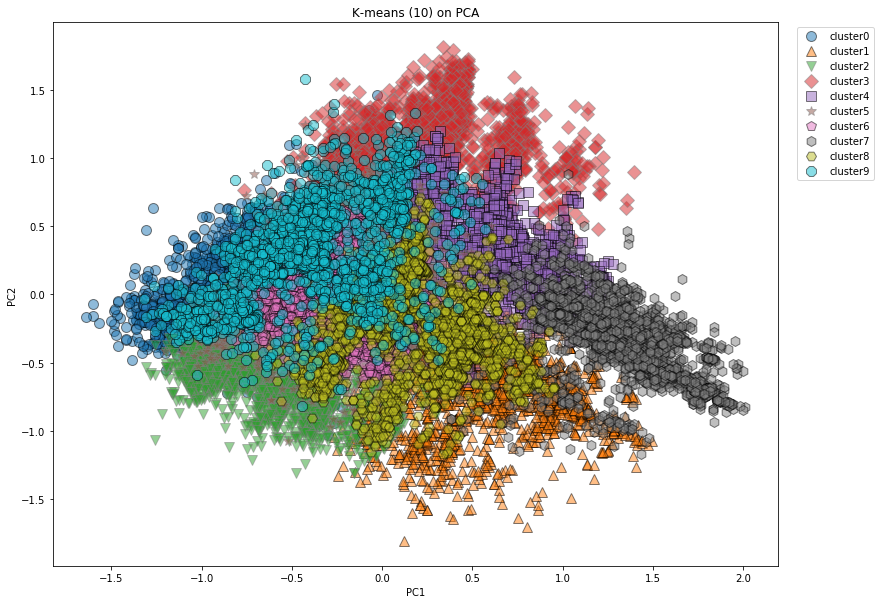

In [38]:
import mglearn

#Plot k-means 10 clusters on PCA
plt.figure(figsize=(13,10))
mglearn.discrete_scatter(pca_sample[:,0], pca_sample[:,1], kmeans10.labels_, alpha = 0.5)
plt.legend(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4',
       'cluster5', 'cluster6', 'cluster7', 'cluster8', 'cluster9'], bbox_to_anchor=(1.02, 1), loc=2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means (10) on PCA")
plt.show

# Apply KMeans with k=50

In [39]:
k = 50
kmeans50 = KMeans(n_clusters=k).fit(recipes_filtered_df)

In [42]:
print("Top terms per cluster:")
order_centroidsK50 = kmeans50.cluster_centers_.argsort()[:, ::-1]
termsK50 = top_ing_clean_l
for i in range(k):
    top_wordsK50 = [termsK50[ind] for ind in order_centroidsK50[i, :30]]
    print("\nCluster {}: {}".format(i, ', '.join(top_wordsK50)))

Top terms per cluster:

Cluster 0: sesame oil, vegetables, soy sauce, sugar, rice vinegar, scallions, water, egg, chicken, pork, cilantro, hoisin sauce, oil, shrimp, honey, oyster sauce, rice, peanut oil, shaoxing wine, mirin, beansprouts, tofu, bell, mushroom, shiitake, rice wine, chinese five-spice powder, lime juice, fish sauce, flour

Cluster 1: vegetables, egg, chicken, oil, bell, chicken broth, parmesan cheese, rice, mayonaise, scallions, yogurt, flour, shrimp, lime juice, coconut milk, beef, bacon, thyme, milk, canola oil, beans, pork, cilantro leaves, mushroom, cumin, cayenne, spray, hot sauce, curry powder, honey

Cluster 2: wine, butter, vegetables, olive oil, shallots, chicken broth, flour, parmesan cheese, thyme, arborio rice, parsley, water, mushroom, leaf parsley, lemon juice, bay leaf, shrimp, chicken stock, tomatoes, rosemary, chicken, egg, heavy cream, tomato paste, bay leaves, leeks, beef broth, thyme sprigs, bacon, parmigiano reggiano cheese

Cluster 3: vegetables, b

<function matplotlib.pyplot.show(*args, **kw)>

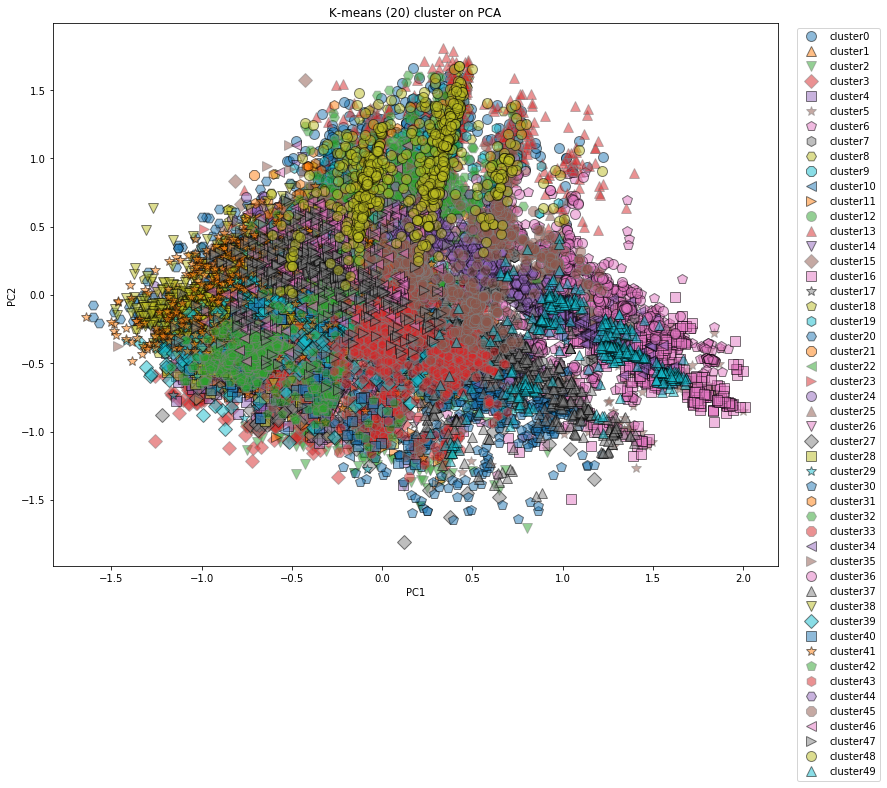

In [44]:
#Plot k-means 50 clusters on PCA
plt.figure(figsize=(13,10))
mglearn.discrete_scatter(pca_sample[:,0], pca_sample[:,1], kmeans50.labels_, alpha = 0.5)
plt.legend(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4',
       'cluster5', 'cluster6', 'cluster7', 'cluster8', 'cluster9', 'cluster10',
       'cluster11', 'cluster12', 'cluster13', 'cluster14', 'cluster15',
       'cluster16', 'cluster17', 'cluster18', 'cluster19', 'cluster20', 'cluster21', 'cluster22', 'cluster23', 'cluster24',
       'cluster25', 'cluster26', 'cluster27', 'cluster28', 'cluster29', 'cluster30',
       'cluster31', 'cluster32', 'cluster33', 'cluster34', 'cluster35',
       'cluster36', 'cluster37', 'cluster38', 'cluster39', 'cluster40', 'cluster41', 'cluster42', 'cluster43', 'cluster44',
       'cluster45', 'cluster46', 'cluster47', 'cluster48', 'cluster49'], bbox_to_anchor=(1.02, 1), loc=2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means (20) cluster on PCA")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

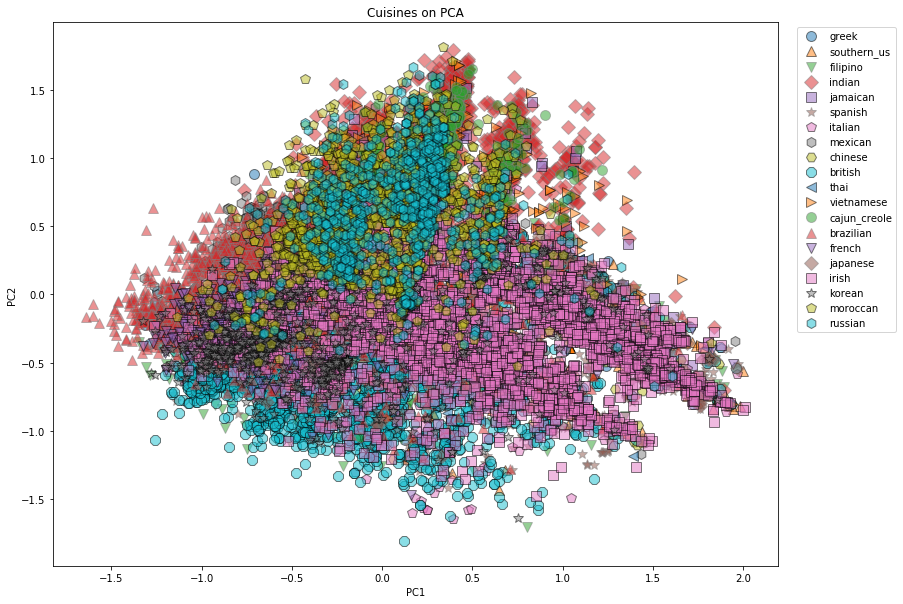

In [45]:
#Plot cuisines on PCA
plt.figure(figsize=(13,10))
mglearn.discrete_scatter(pca_sample[:,0], pca_sample[:,1], recipes.cuisine, alpha = 0.5)
plt.legend(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], bbox_to_anchor=(1.02, 1), loc=2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cuisines on PCA")
plt.show

# Create Market-Basket Matrix

In [53]:
temp_l = df_groceries_clean["items_filtered_clean"]
temp_l = [j for i in temp_l for j in i]
cnt = Counter(temp_l)

ing_value_count = cnt.most_common()
ing_value_count.sort(key= lambda x: x[1], reverse=True)
top_ing_clean = [(x,y) for x,y in ing_value_count if y>=0]

#Creating a list of the top ingredients (keeping all ingredients)
top_ing_clean_l = [x[0] for x in top_ing_clean]

In [54]:
market_basket_df = []

for i in df_groceries_clean["items_filtered_clean"]:
    bin_array = []
    for j in top_ing_clean_l:
        if j in i:
            bin_array.append(1)
        else:
            bin_array.append(0)
    market_basket_df.append(bin_array)
    
market_basket_df = pd.DataFrame(market_basket_df, columns=top_ing_clean_l)
market_basket_df

,vegetables,fruits,milk,rolls/buns,soda,yogurt,bread,water,shopping bags,sausage,...,salad dressing,whisky,toilet cleaner,cosmetic,frozen chicken,bag,kitchen utensil,preservation products,food,sound storage
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
kmeans50.predict(market_basket_df)

ValueError: Incorrect number of features. Got 151 features, expected 462